In [1]:
import os
# import numpy as np
import matplotlib.pyplot as plt
import random
from ultralytics import YOLO

In [2]:
current_path = os.getcwd()
print(f"Chemin actuel : {current_path}")
# input_path = current_path+"/data/x_test/test/ppommk.jpg"

Chemin actuel : /home/romainbourdain/suez



image 1/1 /home/romainbourdain/suez/data/test/images/da565b_jpg.rf.1383dfd6aa0db85c8c593e404946e996.jpg: 480x640 (no detections), 22.6ms
Speed: 2.0ms preprocess, 22.6ms inference, 7.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/romainbourdain/suez/data/test/images/bcca2a_jpg.rf.3530f3c68ee50a83737db9c2544c5102.jpg: 480x640 1 banana, 2.4ms
Speed: 1.3ms preprocess, 2.4ms inference, 34.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/romainbourdain/suez/data/test/images/b99b9c_jpg.rf.d40198c4994e2d2e860ac32432ceeec4.jpg: 384x640 1 clock, 22.9ms
Speed: 0.9ms preprocess, 22.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/romainbourdain/suez/data/test/images/f479ae_jpg.rf.ebcc5433d70ce984db33e959dca35063.jpg: 480x640 1 toilet, 2.6ms
Speed: 1.1ms preprocess, 2.6ms inference, 7.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/romainbourdain/suez/data/test/images/ef806d_jpg.rf.4bff8fa0799cb3a6f

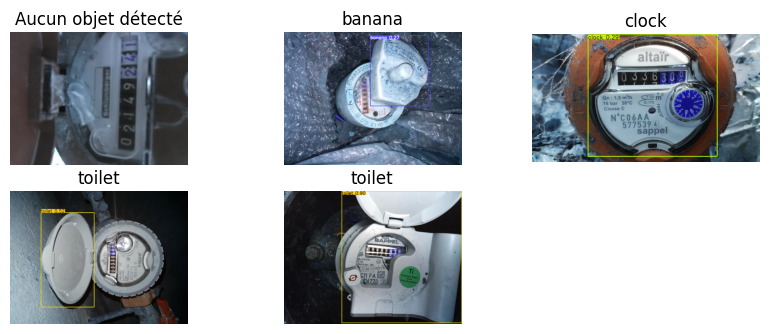

In [3]:
model = YOLO("yolo11n.pt")

# Dossier contenant vos images d'entraînement
folder_path = "./data/test/images"
k = 5  # Nombre d'images aléatoires à afficher après détection

# Charger les noms des classes du modèle
class_names = model.names

# Extensions d'images acceptées
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}

# Liste des chemins des images valides
image_paths = [
    os.path.join(folder_path, f)
    for f in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, f)) and os.path.splitext(f)[1].lower() in valid_extensions
]

# Sélectionner aléatoirement k images pour visualisation
selected_images = random.sample(image_paths, k)

# Afficher les résultats sur les images sélectionnées
plt.figure(figsize=(10, 10))
for i, path in enumerate(selected_images, 1):
    results = model(path)  # Effectuer la détection
    detected_classes = results[0].boxes.cls.cpu().numpy().astype(int)  # Récupérer les classes détectées
    object_names = [class_names[idx] for idx in detected_classes]  # Convertir les indices en noms de classes
    title = ", ".join(set(object_names)) if object_names else "Aucun objet détecté"
    
    annotated_image = results[0].plot()  # Générer une image annotée
    plt.subplot(5, 3, i)
    plt.imshow(annotated_image)
    plt.title(title)
    plt.axis("off")

plt.show()


In [4]:
data_yaml = "./data.yaml" 

output_dir = "./yolo_finetune_results"
os.makedirs(output_dir, exist_ok=True)

model = YOLO("yolo11n.pt")

# Entraînement du modèle
model.train(
    data=data_yaml,       # Chemin vers le fichier data.yaml
    epochs=50,            # Nombre d'époques d'entraînement
    batch=16,             # Taille de batch
    imgsz=640,            # Taille des images (redimensionnement)
    project=output_dir,   # Dossier pour sauvegarder les résultats
    name="fine_tuned_yolo",  # Nom de l'expérience
    pretrained=True,      # Utiliser le poids pré-entraîné comme point de départ
    device=0              # Utiliser GPU (0) ou CPU (-1)
)

# Afficher les résultats de l'entraînement
print("\nFine-tuning du modèle YOLO terminé. Les résultats sont sauvegardés dans:", output_dir)

Ultralytics 8.3.51 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24188MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=./data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=./yolo_finetune_results, name=fine_tuned_yolo9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 9.66MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

AMP: checks passed ✅


train: Scanning /home/romainbourdain/suez/data/train/labels... 1803 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1803/1803 [00:00<00:00, 5504.42it/s]

train: New cache created: /home/romainbourdain/suez/data/train/labels.cache



val: Scanning /home/romainbourdain/suez/data/valid/labels... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<00:00, 3324.73it/s]

val: New cache created: /home/romainbourdain/suez/data/valid/labels.cache


Plotting labels to yolo_finetune_results/fine_tuned_yolo9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolo_finetune_results/fine_tuned_yolo9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.47G      1.356      2.195      1.207         16        640: 100%|██████████| 113/113 [00:05<00:00, 21.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.54it/s]

                   all        110        111      0.878      0.757      0.856       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.46G      1.393      1.488      1.215         22        640: 100%|██████████| 113/113 [00:04<00:00, 23.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.22it/s]

                   all        110        111      0.898      0.873      0.918      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.47G      1.426      1.276      1.249         17        640: 100%|██████████| 113/113 [00:04<00:00, 24.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.16it/s]

                   all        110        111      0.883      0.885      0.927      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.47G      1.396      1.051      1.248         26        640: 100%|██████████| 113/113 [00:04<00:00, 24.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.82it/s]

                   all        110        111      0.953      0.922      0.967      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.46G      1.354     0.9495      1.213         16        640: 100%|██████████| 113/113 [00:04<00:00, 24.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.81it/s]

                   all        110        111       0.85       0.82       0.86      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.46G       1.35     0.8914      1.224         27        640: 100%|██████████| 113/113 [00:04<00:00, 24.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.74it/s]

                   all        110        111      0.927      0.919      0.963      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.46G      1.325     0.8538      1.199         20        640: 100%|██████████| 113/113 [00:04<00:00, 24.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.02it/s]

                   all        110        111      0.915      0.937       0.94      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.47G       1.29     0.8357      1.183         16        640: 100%|██████████| 113/113 [00:04<00:00, 24.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.69it/s]

                   all        110        111      0.954      0.935       0.95       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.46G      1.271     0.8003      1.168         23        640: 100%|██████████| 113/113 [00:04<00:00, 24.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.72it/s]

                   all        110        111      0.954       0.93      0.952      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.46G      1.244     0.7804      1.154         19        640: 100%|██████████| 113/113 [00:04<00:00, 24.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.11it/s]

                   all        110        111      0.953      0.917      0.947      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.46G      1.239     0.7618      1.153         28        640: 100%|██████████| 113/113 [00:04<00:00, 24.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.29it/s]

                   all        110        111      0.974      0.928      0.956      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.47G      1.241     0.7447      1.153         19        640: 100%|██████████| 113/113 [00:04<00:00, 24.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.20it/s]

                   all        110        111      0.945      0.935      0.952       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.46G      1.216     0.7179      1.134         20        640: 100%|██████████| 113/113 [00:04<00:00, 24.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.76it/s]

                   all        110        111      0.984      0.946      0.971      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.46G       1.18     0.7038       1.13         16        640: 100%|██████████| 113/113 [00:04<00:00, 24.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.17it/s]

                   all        110        111      0.936      0.937      0.958      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.46G      1.193     0.6892      1.127         29        640: 100%|██████████| 113/113 [00:04<00:00, 24.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.70it/s]

                   all        110        111      0.967      0.955      0.965      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.47G      1.174     0.6842      1.112         18        640: 100%|██████████| 113/113 [00:04<00:00, 24.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.91it/s]

                   all        110        111      0.972       0.95      0.972      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.46G      1.178     0.6639      1.107         20        640: 100%|██████████| 113/113 [00:04<00:00, 24.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.80it/s]

                   all        110        111      0.973      0.928      0.975      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.46G      1.171     0.6782      1.125         19        640: 100%|██████████| 113/113 [00:04<00:00, 24.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.60it/s]

                   all        110        111      0.937      0.964      0.974      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.46G      1.141     0.6403      1.091         18        640: 100%|██████████| 113/113 [00:04<00:00, 24.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.45it/s]

                   all        110        111      0.955      0.955      0.961      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.47G      1.141     0.6357      1.096         21        640: 100%|██████████| 113/113 [00:04<00:00, 24.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.45it/s]

                   all        110        111      0.963      0.948       0.97      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.46G       1.14     0.6337      1.092         20        640: 100%|██████████| 113/113 [00:04<00:00, 24.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.68it/s]

                   all        110        111      0.973      0.955      0.977       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.46G      1.121     0.6344      1.091         21        640: 100%|██████████| 113/113 [00:04<00:00, 24.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.47it/s]

                   all        110        111      0.979      0.955      0.965      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.46G       1.09     0.6082      1.079         17        640: 100%|██████████| 113/113 [00:04<00:00, 24.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.18it/s]

                   all        110        111      0.977      0.946      0.963      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.47G      1.083     0.5961      1.072         25        640: 100%|██████████| 113/113 [00:04<00:00, 24.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.16it/s]

                   all        110        111      0.988      0.964      0.979      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.46G       1.08     0.5908      1.068         24        640: 100%|██████████| 113/113 [00:04<00:00, 24.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.14it/s]

                   all        110        111      0.972      0.955      0.978      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.46G      1.079     0.5844      1.069         30        640: 100%|██████████| 113/113 [00:04<00:00, 24.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.94it/s]

                   all        110        111      0.991      0.952      0.986      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.46G      1.041     0.5709      1.049         29        640: 100%|██████████| 113/113 [00:04<00:00, 24.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.16it/s]

                   all        110        111      0.972      0.955      0.978      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.47G      1.051     0.5693      1.053         18        640: 100%|██████████| 113/113 [00:04<00:00, 24.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.98it/s]

                   all        110        111      0.972      0.955      0.963      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.46G      1.024     0.5524       1.05         21        640: 100%|██████████| 113/113 [00:04<00:00, 24.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.74it/s]

                   all        110        111      0.975      0.955      0.969      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.46G      1.044     0.5534       1.05         22        640: 100%|██████████| 113/113 [00:04<00:00, 24.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.77it/s]

                   all        110        111      0.979      0.964      0.978      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.46G      1.002     0.5413      1.039         12        640: 100%|██████████| 113/113 [00:04<00:00, 24.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.78it/s]

                   all        110        111      0.974      0.964      0.977       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.47G      1.003      0.534      1.039         19        640: 100%|██████████| 113/113 [00:04<00:00, 24.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.65it/s]

                   all        110        111      0.973      0.963      0.977      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.46G     0.9822     0.5267      1.026         21        640: 100%|██████████| 113/113 [00:04<00:00, 24.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.16it/s]

                   all        110        111      0.982      0.963      0.976      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.46G      1.008     0.5415      1.039         25        640: 100%|██████████| 113/113 [00:04<00:00, 24.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.04it/s]

                   all        110        111      0.972      0.973      0.977      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.46G     0.9722     0.5145      1.018         21        640: 100%|██████████| 113/113 [00:04<00:00, 24.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.75it/s]

                   all        110        111      0.991      0.963      0.981      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.47G     0.9896     0.5267      1.033         18        640: 100%|██████████| 113/113 [00:04<00:00, 24.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.14it/s]

                   all        110        111      0.987      0.955      0.974      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.46G     0.9616      0.505       1.02         24        640: 100%|██████████| 113/113 [00:04<00:00, 24.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.13it/s]

                   all        110        111      0.995      0.955      0.979      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.46G     0.9459     0.4978      1.013         19        640: 100%|██████████| 113/113 [00:04<00:00, 24.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.92it/s]

                   all        110        111      0.982      0.973      0.986      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.46G     0.9515     0.5045      1.026         18        640: 100%|██████████| 113/113 [00:04<00:00, 24.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.94it/s]

                   all        110        111          1      0.964      0.987      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.47G     0.9298      0.485      1.006         15        640: 100%|██████████| 113/113 [00:04<00:00, 24.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.99it/s]

                   all        110        111      0.973      0.972      0.982      0.703


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.46G     0.8672      0.426     0.9628         11        640: 100%|██████████| 113/113 [00:04<00:00, 23.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.49it/s]

                   all        110        111      0.981      0.964      0.985      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.46G     0.8611     0.4151     0.9565         11        640: 100%|██████████| 113/113 [00:04<00:00, 24.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.27it/s]

                   all        110        111      0.973      0.972      0.975      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.46G      0.847     0.4071     0.9501         11        640: 100%|██████████| 113/113 [00:04<00:00, 24.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.07it/s]

                   all        110        111      0.987      0.955       0.98      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.47G      0.833     0.4079     0.9429         11        640: 100%|██████████| 113/113 [00:04<00:00, 25.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.12it/s]

                   all        110        111      0.989      0.955      0.971      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.46G     0.8016     0.3938      0.938         11        640: 100%|██████████| 113/113 [00:04<00:00, 24.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.87it/s]

                   all        110        111       0.98      0.955      0.969      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.46G     0.8057     0.3939     0.9384         11        640: 100%|██████████| 113/113 [00:04<00:00, 24.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.13it/s]

                   all        110        111      0.979      0.973       0.98      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.46G     0.7857     0.3829      0.933         11        640: 100%|██████████| 113/113 [00:04<00:00, 24.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.02it/s]

                   all        110        111       0.98      0.955      0.982      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.47G     0.7658     0.3747     0.9259         11        640: 100%|██████████| 113/113 [00:04<00:00, 24.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.28it/s]

                   all        110        111      0.981      0.955      0.986      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.46G     0.7507     0.3705      0.921         11        640: 100%|██████████| 113/113 [00:04<00:00, 24.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.84it/s]

                   all        110        111      0.973      0.963      0.986      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.46G     0.7339     0.3652     0.9135         10        640: 100%|██████████| 113/113 [00:04<00:00, 24.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.32it/s]

                   all        110        111      0.963      0.964      0.988       0.71



50 epochs completed in 0.070 hours.
Optimizer stripped from yolo_finetune_results/fine_tuned_yolo9/weights/last.pt, 5.5MB
Optimizer stripped from yolo_finetune_results/fine_tuned_yolo9/weights/best.pt, 5.5MB

Validating yolo_finetune_results/fine_tuned_yolo9/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24188MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.27it/s]


                   all        110        111      0.973      0.963      0.986       0.72
Speed: 0.2ms preprocess, 0.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to yolo_finetune_results/fine_tuned_yolo9

Fine-tuning du modèle YOLO terminé. Les résultats sont sauvegardés dans: ./yolo_finetune_results


In [5]:
print("\nDémarrage des détections sur les images de test...")
model.val(data=data_yaml)


Démarrage des détections sur les images de test...
Ultralytics 8.3.51 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24188MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/romainbourdain/suez/data/valid/labels.cache... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.26it/s]


                   all        110        111      0.973      0.963      0.986      0.722
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to yolo_finetune_results/fine_tuned_yolo92


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f277a379dc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
model = YOLO("./yolo_finetune_results/fine_tuned_yolo9/weights/best.pt")

# Dossier d'images à tester
# test_images = "./data/x_test_augmented/test/images" #A REDEFINIR

# Détection sur les images
results = model.predict(source="./data/test/images", save=True, imgsz=640)
print("Détection terminée. Images sauvegardées dans le répertoire runs/detect/")


image 1/59 /home/romainbourdain/suez/data/test/images/a472ae_jpg.rf.85c747ae7e9e3a84e4ebf0c6943bd85d.jpg: 480x640 1 nouvelle_classe, 23.0ms
image 2/59 /home/romainbourdain/suez/data/test/images/b81a67_jpg.rf.1634ffe6ae7cfb6095eb9a4b0cf51a92.jpg: 640x480 1 nouvelle_classe, 25.4ms
image 3/59 /home/romainbourdain/suez/data/test/images/b92c50_jpg.rf.f6c21f618116f7149c641cbb88058e26.jpg: 416x640 1 nouvelle_classe, 22.2ms
image 4/59 /home/romainbourdain/suez/data/test/images/b99b9c_jpg.rf.d40198c4994e2d2e860ac32432ceeec4.jpg: 384x640 1 nouvelle_classe, 22.5ms
image 5/59 /home/romainbourdain/suez/data/test/images/baeb02_jpg.rf.23c67476cf8c85234b8103469727be15.jpg: 480x640 1 nouvelle_classe, 2.6ms
image 6/59 /home/romainbourdain/suez/data/test/images/bcca2a_jpg.rf.3530f3c68ee50a83737db9c2544c5102.jpg: 480x640 1 nouvelle_classe, 2.4ms
image 7/59 /home/romainbourdain/suez/data/test/images/bdac62_jpg.rf.3fd653bd3e01b5275e3e0ead60297255.jpg: 384x640 1 nouvelle_classe, 2.7ms
image 8/59 /home/romai